<a href="https://colab.research.google.com/github/Adachi-Yoshitaka/zemikadai/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.cm as cm
from sklearn.decomposition import PCA

from sklearn import datasets, preprocessing
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [ ]:
data = pd.read_csv('/content/drive/My Drive/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.max()

label         9
pixel0        0
pixel1        0
pixel2        0
pixel3        0
           ... 
pixel779     83
pixel780    227
pixel781      0
pixel782    163
pixel783      0
Length: 785, dtype: int64

In [ ]:
X_train=data.iloc[:1000,1:].values
y_train=data.iloc[:1000,0].values

In [ ]:
print("{}".format(X_train.shape))
print("{}".format(np.unique(y_train)))

(1000, 784)
[0 1 2 3 4 5 6 7 8 9]


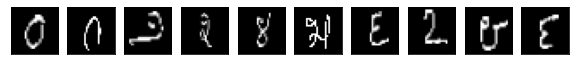

In [ ]:
fig, axes = plt.subplots(1,10, figsize=(10,1),subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
  ax.imshow(X_train[i].reshape(28,28),cmap="gray")

<function matplotlib.pyplot.show>

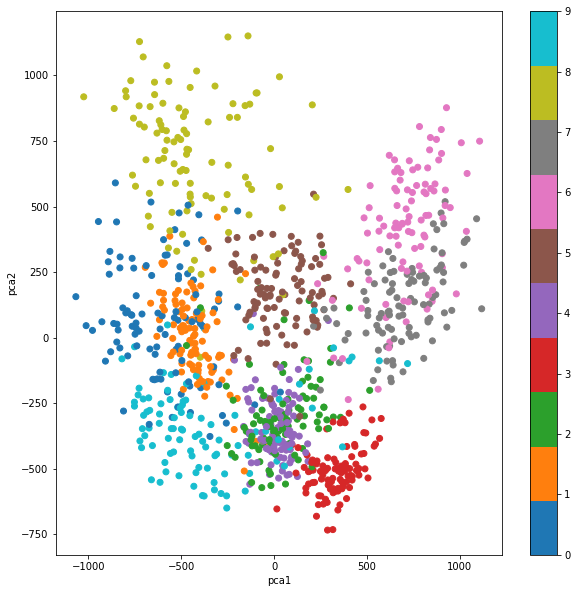

In [ ]:
pca = PCA(n_components=2)
digits_pca=pca.fit_transform(X_train)

plt.figure(figsize=(10,10))

plt.scatter(digits_pca[:,0],digits_pca[:,1],c=y_train,cmap=cm.tab10)
plt.colorbar()
plt.xlabel("pca1")
plt.ylabel("pca2")
plt.show

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


<function matplotlib.pyplot.show>

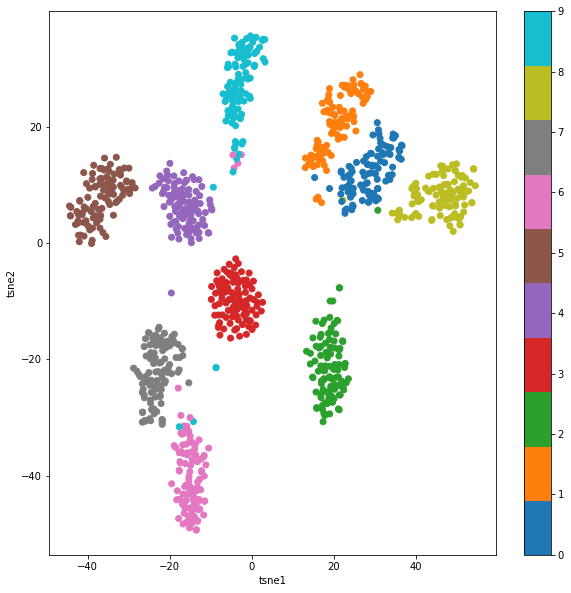

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
digits_tsne=tsne.fit_transform(X_train)

plt.figure(figsize=(10,10))

plt.scatter(digits_tsne[:,0],digits_tsne[:,1],c=y_train,cmap=cm.tab10)
plt.colorbar()
plt.xlabel("tsne1")
plt.ylabel("tsne2")
plt.show

<function matplotlib.pyplot.show>

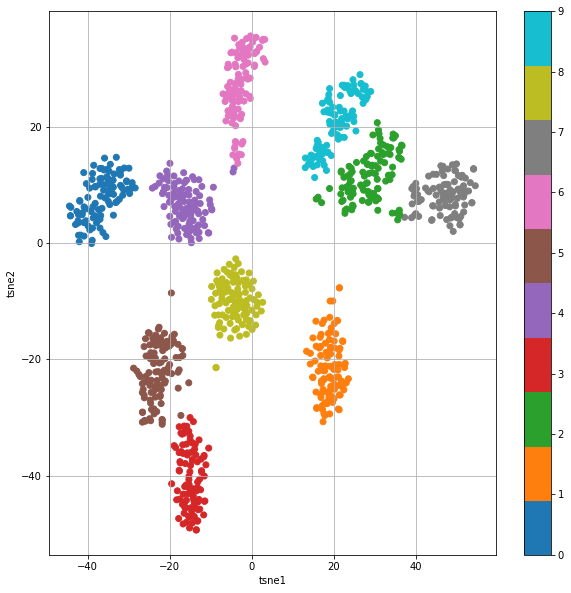

In [ ]:
cls = KMeans(n_clusters=10)
result = cls.fit(digits_tsne)

plt.figure(figsize=(10,10))

plt.scatter(digits_tsne[:,0],digits_tsne[:,1],c=result.labels_,cmap=cm.tab10)
plt.colorbar()
plt.xlabel("tsne1")
plt.ylabel("tsne2")
plt.grid()
plt.show

<function matplotlib.pyplot.show>

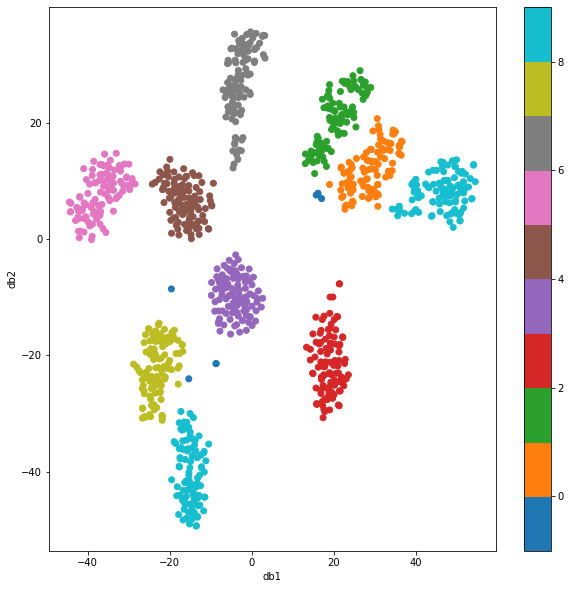

In [ ]:
db = DBSCAN(eps=3)
digits_db=db.fit(digits_tsne)

plt.figure(figsize=(10,10))

plt.scatter(digits_tsne[:,0],digits_tsne[:,1],c=digits_db.labels_,cmap=cm.tab10)
plt.colorbar()
plt.xlabel("db1")
plt.ylabel("db2")
plt.show